# Vis_contest

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

## Загрузка данных

In [2]:
data = pd.read_csv('mlcourse_open_first_survey_data.csv', header=0, parse_dates=['timestamp'],
                   names=['timestamp', 'introduce', 'is_worked_jupyter', 'expectations',
                          'what_to_add', 'fav_sport', 'is_agree', 'working_day', 'is_motivated',
                          'is_ready_for_project', 'is_raiting_wanted', 'top_100_idea',
                          'math_prep', 'q1_dispersion', 'q2_minimum', 'q3_norm_dist',
                          'python_fib', 'is_python_ready', 'github_level', 'reward', 'movie'])

Добавим столбец с количеством правильных ответов

In [3]:
data['q_overall'] = ((data.q1_dispersion == '3').astype(int) +
                     (data.q2_minimum == '-12').astype(int) +
                     (data.q3_norm_dist == 2).astype(int))

Перекрестная таблица: строки - уровень подготовки, столбцы - кол-во верных ответов

In [4]:
df = pd.crosstab(data.math_prep, data.q_overall)
df

q_overall,0,1,2,3
math_prep,,,,
1,16,10,10,13
2,28,17,25,42
3,31,20,79,163
4,13,9,62,181
5,4,3,12,79


In [5]:
# Таблица с относительными значениями по каждому уровню подготовки для отрисовки графика
df_rel = df.div(df.sum(axis=1), axis=0)
df_rel

q_overall,0,1,2,3
math_prep,,,,
1,0.326531,0.204082,0.204082,0.265306
2,0.250000,0.151786,0.223214,0.375000
3,0.105802,0.068259,0.269625,0.556314
4,0.049057,0.033962,0.233962,0.683019
5,0.040816,0.030612,0.122449,0.806122


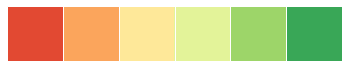

In [6]:
# палитра для графика
sns.palplot(sns.color_palette('RdYlGn'))

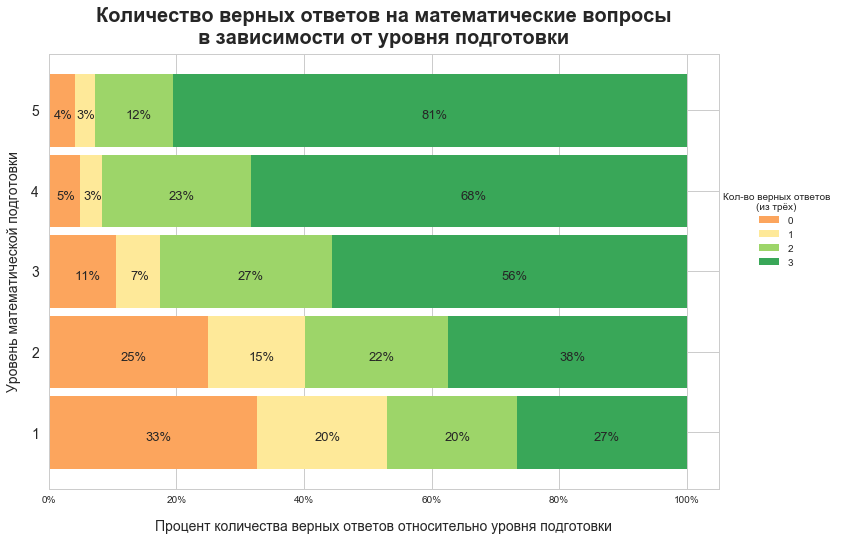

In [7]:
# стиль и цвета графика
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette('RdYlGn')[1:3] + sns.color_palette('RdYlGn')[-2:])

# график
ax = df_rel.plot(kind='barh', stacked=True, figsize=(12, 8), width=0.9)

plt.setp(ax.get_yticklabels(), fontsize=14)  # размер подписей оси y
ax.tick_params(axis='y', which='major', pad=10)  # отступ подписей оси y от самой оси
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0%}')) # %  у подписей оси x

# добавление подписей на сами столбцы
for p in ax.patches:
    ax.annotate('{:.0%}'.format(p.get_width()),
                xy=(p.get_x() + p.get_width()/2, p.get_y()),
                xytext=(-8, 28),
                textcoords='offset points', size=13)
    
plt.title('Количество верных ответов на математические вопросы\nв зависимости от уровня подготовки', size=20, weight='bold', y=1.01)
ax.set_xlabel('Процент количества верных ответов относительно уровня подготовки', size=14, labelpad=15)
ax.set_ylabel('Уровень математической подготовки', size=14, labelpad=10)
ax.legend(loc=(1,0.5), title='Кол-во верных ответов\n            (из трёх)')

plt.show()
# plt.savefig('answers_math_lev.png', bbox_inches='tight', pad_inches=0.5)